In [3]:
import zipline
import zipline.pipeline
import pandas_datareader.data as pdr
from datetime import date

#yf.pdr_override() # <== that's all it takes :-)
# download dataframe
symbol = 'SPY'
start_date = "2015-01-01"
end_date = str(date.today())
df = pdr.get_data_yahoo(symbol, start_date, end_date)   
#df.head(5)


# Convert DataFrame to Panel
The data imported in Python IDE by aforementioned methods is saved as a Dataframe. Now we need to convert it into Panel format and modify major and minor axis.

Zipline accepts ['Open', 'High', 'Low', 'Close', 'Volume'] data as minor axis and ‘Date’ as major axis in UTC time format. Since if we did not have the Date in UTC format, we convert it by using “tz_localize(pytz.utc)”.
Now ‘panel’ is the dataset ‘data’ saved in the panel format. This is how a Panel format looks like:

In [5]:
import pandas as pd
import pytz

data = {}
#data['SPY'] = df.filter(items=['Open', 'High', 'Low', 'Close', 'Volume'])
#panel = pd.Panel(data)
#panel.minor_axis = ['Open', 'High', 'Low', 'Close', 'Volume']

data['SPY'] = df.filter(items=['Close'])
panel = pd.Panel(data)
panel.minor_axis = ['Close']
panel.major_axis = panel.major_axis.tz_localize(pytz.utc)
panel['SPY']['Close'].to_csv('/home/jupyter/zipline/data/SPY_benchmark.csv')

#panel['SPY'].tz_localize('UTC') #---> this will cause error Already tz-aware, use tz_convert to convert.
x=pd.Series.from_csv('/home/jupyter/zipline/data/SPY_benchmark.csv')
#x.index



/usr/local/lib/python3.5/site-packages/pandas/core/series.py:2890: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)


In [6]:
%load_ext zipline

In [7]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  


In [8]:
#etf_prices = get_pricing('QQQ', start_date='2016-1-1', end_date='2019-5-1', fields='close_price')

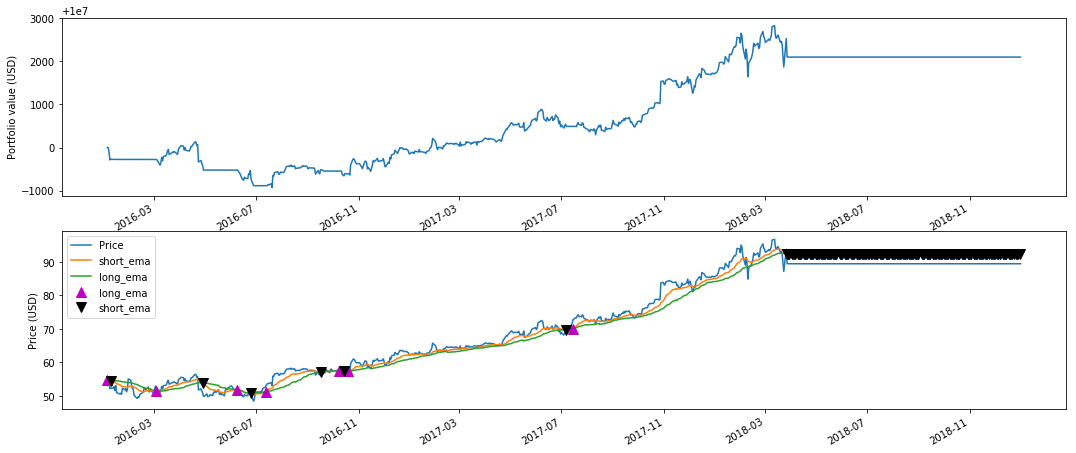

,Price,algo_volatility,algorithm_period_return,alpha,benchmark_period_return,benchmark_volatility,beta,buy,capital_used,ending_cash,...,short_value,shorts_count,sortino,starting_cash,starting_exposure,starting_value,symbol,trading_days,transactions,treasury_period_return
2016-01-04 21:00:00+00:00,54.800,NaN,0.000000e+00,NaN,2.010200e+02,NaN,NaN,True,0.0,10000000.0,...,0.0,0,NaN,10000000.0,0.0,0.0,MSFT,1,[],0.0
2016-01-05 21:00:00+00:00,55.050,0.000001,-1.000000e-07,0.015010,4.087977e+04,3.816449,-2.941208e-07,False,-5506.0,9994494.0,...,0.0,0,-11.224972,10000000.0,0.0,0.0,MSFT,2,"[{'sid': Equity(1894 [MSFT]), 'order_id': '556...",0.0
2016-01-06 21:00:00+00:00,54.050,0.000091,-1.010000e-05,-0.189015,8.168794e+06,21.888360,4.130033e-06,False,0.0,9994494.0,...,0.0,0,-9.256340,9994494.0,5505.0,5505.0,MSFT,3,[],0.0
2016-01-07 21:00:00+00:00,52.170,0.000143,-2.890000e-05,-0.124653,1.593324e+09,53.476336,2.620298e-06,False,0.0,9994494.0,...,0.0,0,-10.772161,9994494.0,5405.0,5405.0,MSFT,4,[],0.0
2016-01-08 21:00:00+00:00,52.330,0.000139,-2.730000e-05,-0.028948,3.073840e+11,67.373016,5.627309e-07,False,0.0,9994494.0,...,0.0,0,-9.101481,9994494.0,5217.0,5217.0,MSFT,5,[],0.0
2016-01-11 21:00:00+00:00,52.300,0.000129,-2.770000e-05,-0.010476,5.935892e+13,69.439099,1.891379e-07,False,5229.0,9999723.0,...,0.0,0,-8.428729,9994494.0,5233.0,5233.0,MSFT,6,"[{'sid': Equity(1894 [MSFT]), 'order_id': '0dc...",0.0
2016-01-12 21:00:00+00:00,52.780,0.000121,-2.770000e-05,-0.004196,1.155481e+16,65.712550,6.489357e-08,False,0.0,9999723.0,...,0.0,0,-7.803487,9999723.0,0.0,0.0,MSFT,7,[],0.0
2016-01-13 21:00:00+00:00,51.640,0.000114,-2.770000e-05,0.005268,2.193449e+18,73.361223,-1.245471e-07,False,0.0,9999723.0,...,0.0,0,-7.299494,9999723.0,0.0,0.0,MSFT,8,[],0.0
2016-01-14 21:00:00+00:00,53.110,0.000108,-2.770000e-05,0.008129,4.231821e+20,70.798604,-1.806701e-07,False,0.0,9999723.0,...,0.0,0,-6.882029,9999723.0,0.0,0.0,MSFT,9,[],0.0
2016-01-15 21:00:00+00:00,50.990,0.000103,-2.770000e-05,0.010948,7.990102e+22,75.540916,-2.368264e-07,False,0.0,9999723.0,...,0.0,0,-6.528866,9999723.0,0.0,0.0,MSFT,10,[],0.0


In [9]:
%%zipline --bundle quantopian-quandl --start 2016-1-1 --end 2019-1-1 -o results.pickle

#Type:        module
#String form: <module 'zipline.examples.dual_ema_talib' from '/usr/local/lib/python3.6/site-packages/zipline/examples/dual_ema_talib.py'>
#File:        /usr/local/lib/python3.6/site-packages/zipline/examples/dual_ema_talib.py
#Source:     

#!/usr/bin/env python
#
# Copyright 2014 Quantopian, Inc.
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.


"""Dual Moving Average Crossover algorithm.

This algorithm buys apple once its short moving average crosses
its long moving average (indicating upwards momentum) and sells
its shares once the averages cross again (indicating downwards
momentum).

"""

from zipline.api import order, record, symbol
from zipline.finance import commission, slippage
# Import exponential moving average from talib wrapper
from talib import EMA

stocks = ['MSFT']
def initialize(context):
    context.stocks = stocks

    # To keep track of whether we invested in the stock or not
    context.invested = False

    # Explicitly set the commission/slippage to the "old" value until we can
    # rebuild example data.
    # github.com/quantopian/zipline/blob/master/tests/resources/
    # rebuild_example_data#L105
    context.set_commission(commission.PerShare(cost=.0075, min_trade_cost=1.0))
    context.set_slippage(slippage.VolumeShareSlippage())


def handle_data(context, data):
    for stock in context.stocks:
        context.asset = symbol(stock)
        trailing_window = data.history(context.asset, 'price', 40, '1d')
        if trailing_window.isnull().values.any():
            return
        short_ema = EMA(trailing_window.values, timeperiod=20)
        long_ema = EMA(trailing_window.values, timeperiod=40)

        buy = False
        sell = False

        if (short_ema[-1] > long_ema[-1]) and not context.invested:
            order(context.asset, 100)
            context.invested = True
            buy = True
        elif (short_ema[-1] < long_ema[-1]) and context.invested:
            order(context.asset, -100)
            context.invested = False
            sell = True

        record(symbol=stock,
               Price=data.current(context.asset, "price"),
               short_ema=short_ema[-1],
               long_ema=long_ema[-1],
               buy=buy,
               sell=sell)


# Note: this function can be removed if running
# this algorithm on quantopian.com

def analyze(context=None, results=None):
    import matplotlib.pyplot as plt
    import logbook
    global g_results
    
    logbook.StderrHandler().push_application()
    log = logbook.Logger('Algorithm')

    fig = plt.figure()
    ax1 = fig.add_subplot(211)
    results.portfolio_value.plot(ax=ax1)
    ax1.set_ylabel('Portfolio value (USD)')

    ax2 = fig.add_subplot(212)
    ax2.set_ylabel('Price (USD)')

    # If data has been record()ed, then plot it.
    # Otherwise, log the fact that no data has been recorded.
    if 'Price' in results and 'short_ema' in results and 'long_ema' in results:
        results[['Price', 'short_ema', 'long_ema']].plot(ax=ax2)

        ax2.plot(
            results.index[results.buy],
            results.loc[results.buy, 'long_ema'],
            '^',
            markersize=10,
            color='m',
        )
        ax2.plot(
            results.index[results.sell],
            results.loc[results.sell, 'short_ema'],
            'v',
            markersize=10,
            color='k',
        )
        plt.legend(loc=0)
        plt.gcf().set_size_inches(18, 8)
    else:
        msg = 'Price, short_ema and long_ema data not captured using record().'
        ax2.annotate(msg, xy=(0.1, 0.5))
        log.info(msg)

    plt.show()

In [10]:
#https://github.com/quantopian/pyfolio/blob/master/pyfolio/examples/zipline_algo_example.ipynb
import pyfolio as pf
results = pd.read_pickle('results.pickle')
returns, positions, transactions = pf.utils.extract_rets_pos_txn_from_zipline(results)

In [11]:
transactions.head(5)

,amount,commission,dt,order_id,price,sid,symbol,txn_dollars
2016-01-05 21:00:00+00:00,100,None,2016-01-05 21:00:00+00:00,5567851d1bc94a4091c603e4d967173b,55.05,Equity(1894 [MSFT]),Equity(1894 [MSFT]),-5505.0
2016-01-11 21:00:00+00:00,-100,None,2016-01-11 21:00:00+00:00,0dc3251333e743b89b24489f0f11e6ef,52.30,Equity(1894 [MSFT]),Equity(1894 [MSFT]),5230.0
2016-03-03 21:00:00+00:00,100,None,2016-03-03 21:00:00+00:00,b23b10f347a34d03bbcb3813a65d77da,52.35,Equity(1894 [MSFT]),Equity(1894 [MSFT]),-5235.0
2016-04-28 20:00:00+00:00,-100,None,2016-04-28 20:00:00+00:00,284dca7415bf45abaf37167ca11dcba4,49.90,Equity(1894 [MSFT]),Equity(1894 [MSFT]),4990.0
2016-06-08 20:00:00+00:00,100,None,2016-06-08 20:00:00+00:00,a1d28be5e75f4a64ae94f9d44c6ec657,52.04,Equity(1894 [MSFT]),Equity(1894 [MSFT]),-5204.0


/usr/local/lib/python3.5/site-packages/numpy/core/fromnumeric.py:56: FutureWarning: 'argmin' is deprecated. Use 'idxmin' instead. The behavior of 'argmin' will be corrected to return the positional minimum in the future. Use 'series.values.argmin' to get the position of the minimum now.
  return getattr(obj, method)(*args, **kwds)


Text(0.5,0,'Date')

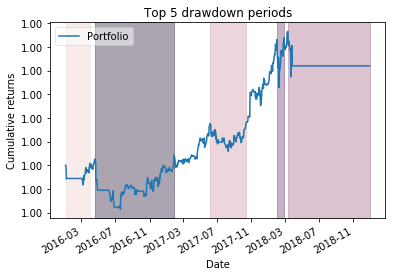

In [12]:
pf.plot_drawdown_periods(returns, top=5).set_xlabel('Date')

Start date,2016-01-04
End date,2018-12-31
Total months,35
,Backtest
Annual return,0.0%
Cumulative returns,0.0%
Annual volatility,0.0%
Sharpe ratio,0.61
Calmar ratio,0.66
Stability,0.86
Max drawdown,-0.0%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,0.01,2016-04-18,2016-07-19,2017-01-27,205
1,0.01,2018-01-31,2018-02-08,2018-02-26,19
2,0.01,2018-03-12,2018-03-23,NaT,NaN
3,0.01,2017-06-06,2017-08-10,2017-10-13,94
4,0.00,2016-01-04,2016-03-07,2016-03-31,64


Stress Events,mean,min,max
New Normal,0.00%,-0.00%,0.01%


Top 10 long positions of all time,max
sid,
MSFT,0.10%


Top 10 short positions of all time,max
sid,


Top 10 positions of all time,max
sid,
MSFT,0.10%


RuntimeError: Selected KDE bandwidth is 0. Cannot estimate density.

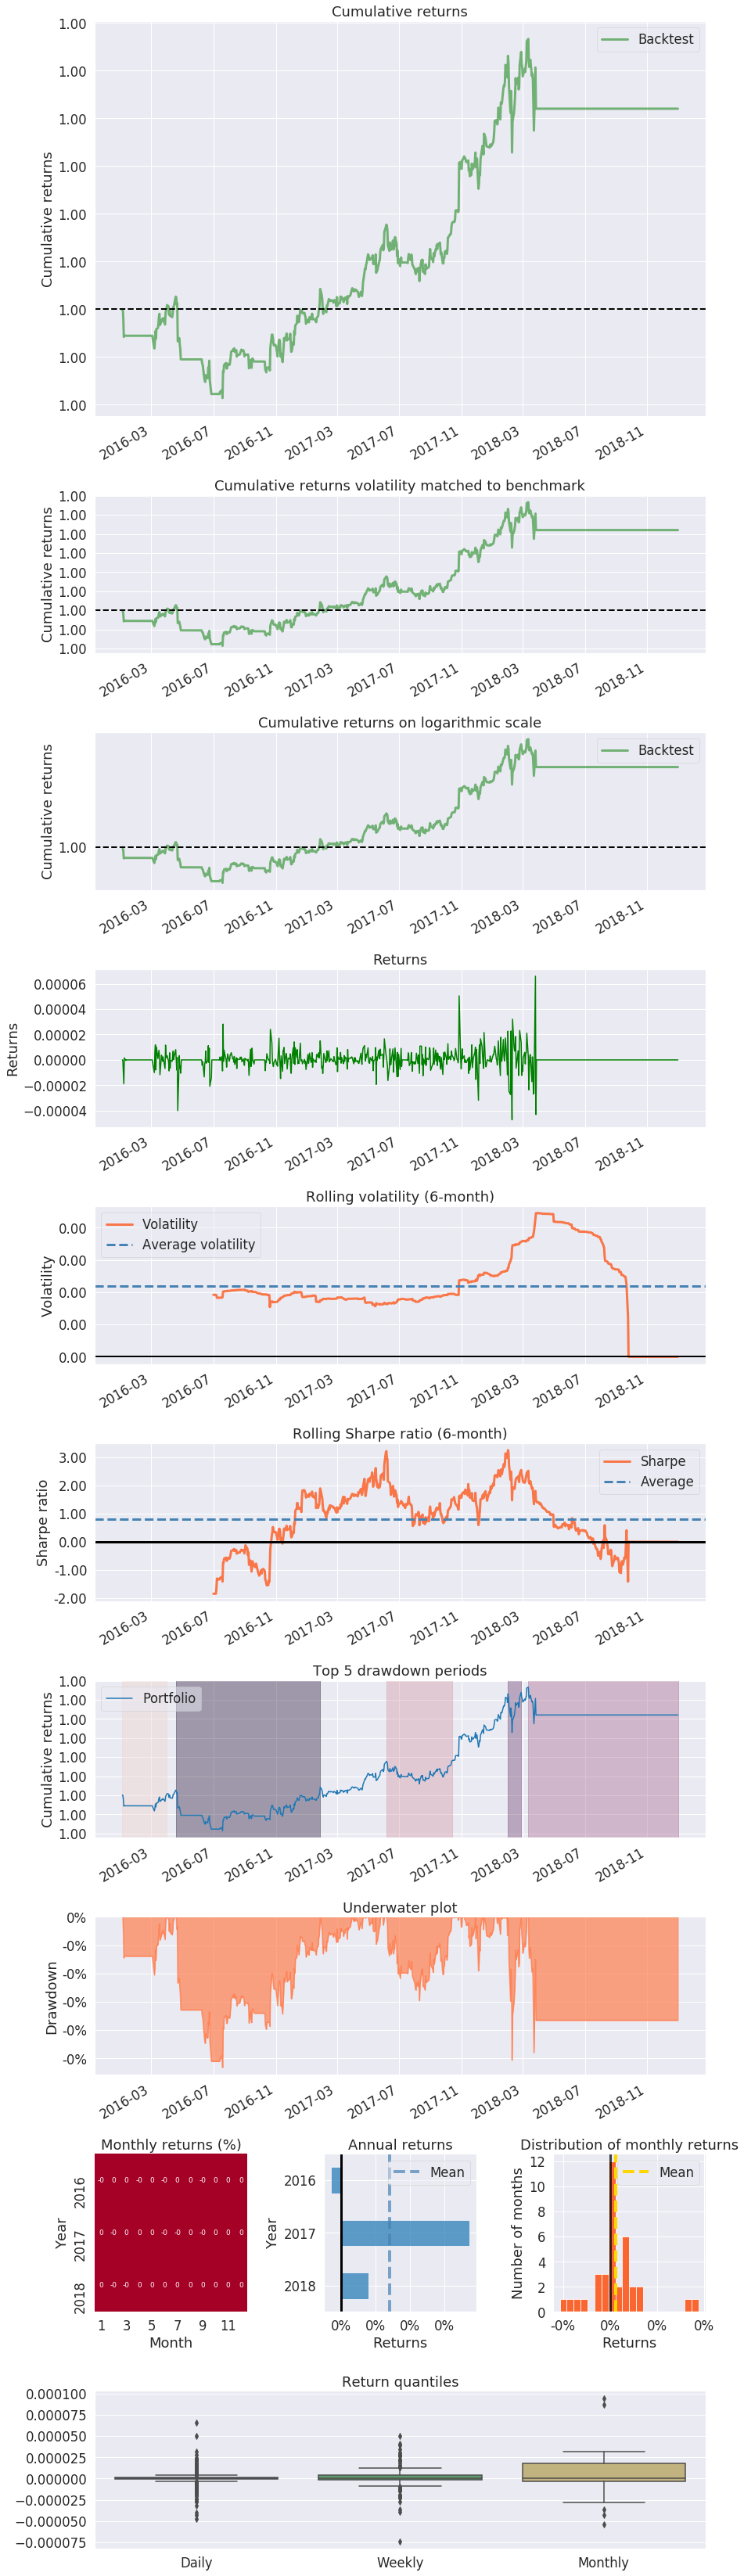

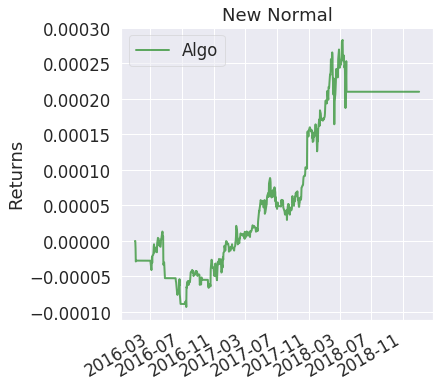

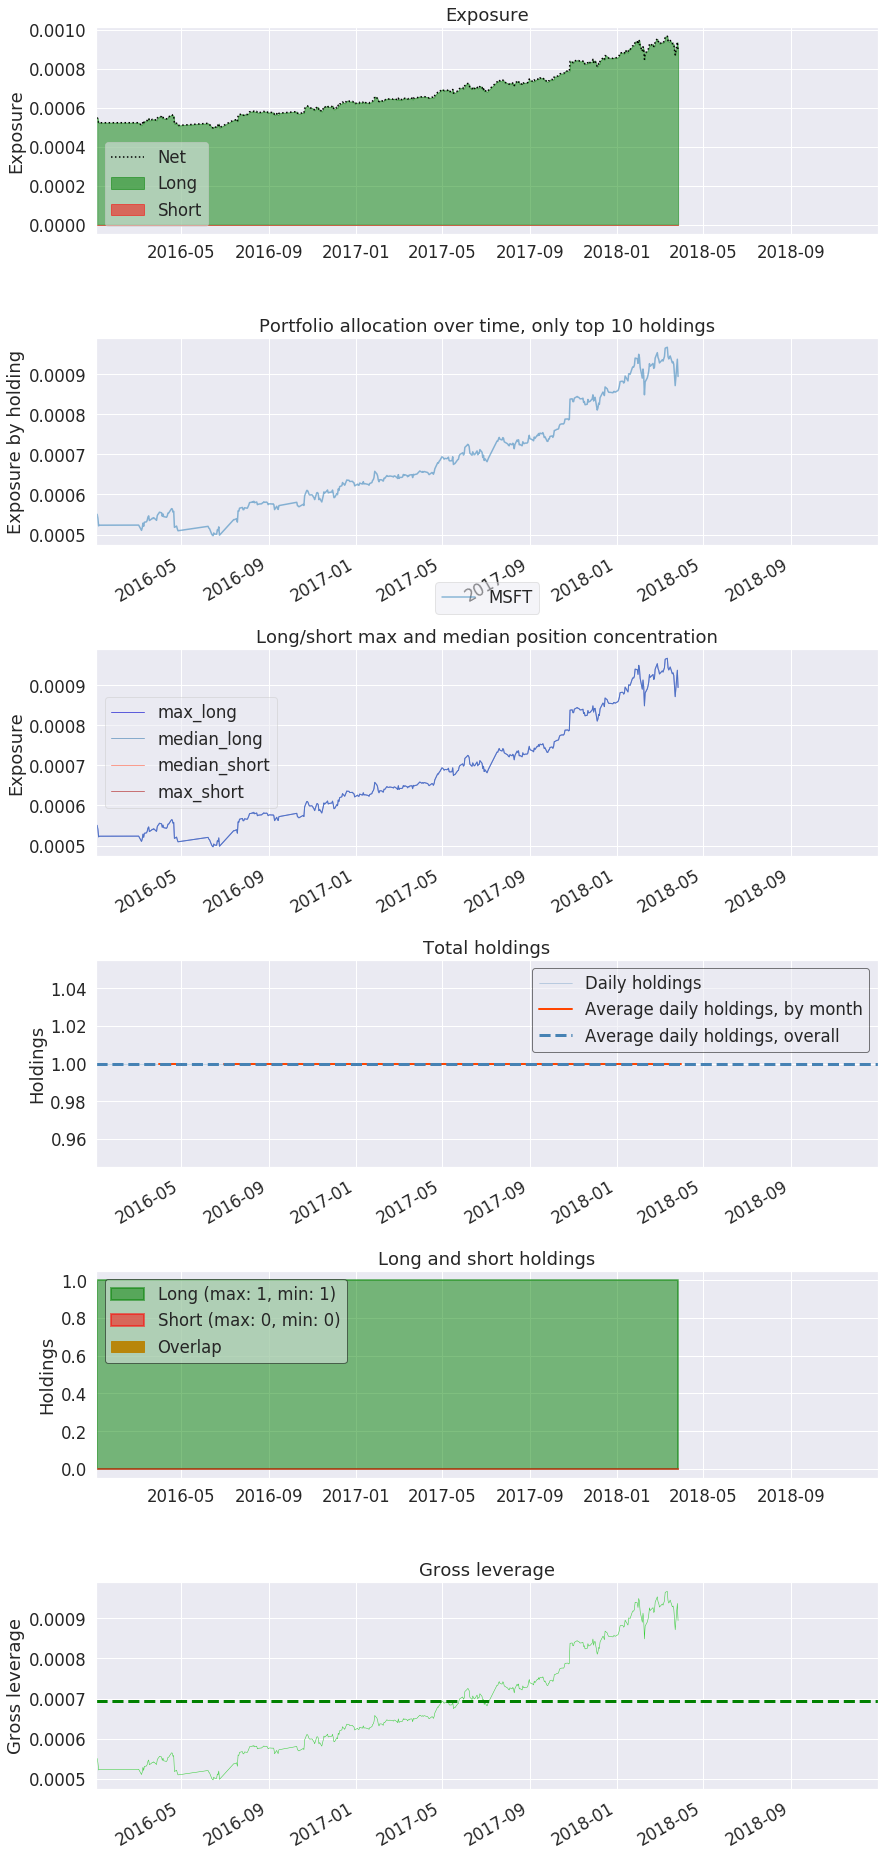

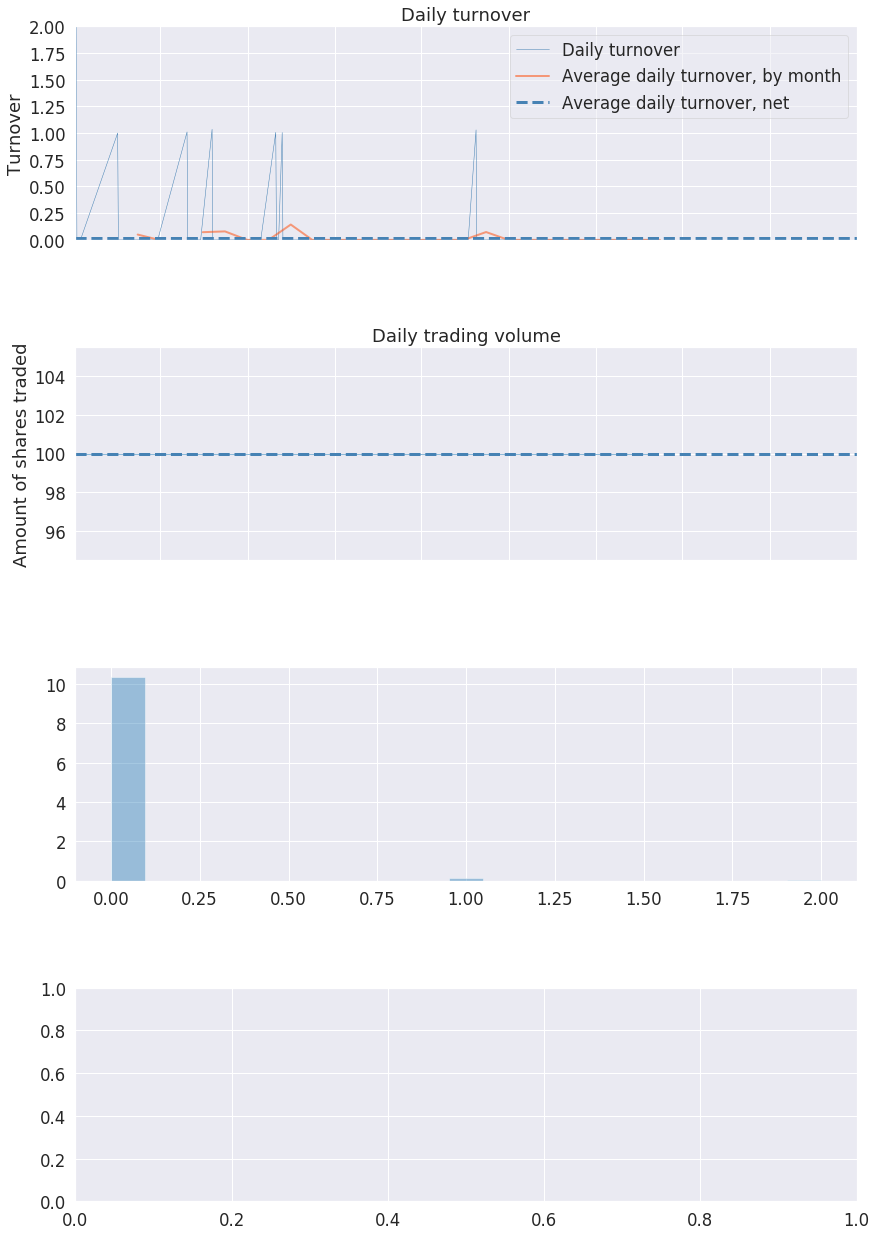

In [13]:
pf.create_full_tear_sheet(returns, positions=positions, transactions=transactions,
                          round_trips=True)